# Neurale Netzwerke - Tutorial Teil 1
---

## 0. Vorbereitungen
---

Damit ihr optimal durch dieses Tutorial gehen könnt, ist es wichtig, die vorherigen Tutorials, nämlich zu Python und Linearer Algebra durchgegangen und in mindestens groben Zugen verstanden zu haben.

## 1. Theorie 
---

### 1.1 Aufbau eines neuronalen Netzwerkes

Um ein anwendungsbezogenes Verständnis aufzubauen, wollen wir uns zu Beginn mit der Grobstruktur eines einfachen neuronalen Netzwerkes beschäftigen, nämlich eines __fully-connected neural networks (FCN)__.
Eine schematische Darstellung findet sich in <img src="Bilder/fnc.jpeg"> 

Hier sei schonmal angemerkt das die allgemeine Online-Community auf diesem Fachgebiet auf Englisch kommuniziert, daher werden wir uns auch hier viel der englischen Sprache bedienen.

Auf diesem Bild zu sehen ist die grundlegende Struktur eines Netzes. Bedient man sich der Nervenzellen-Analogie, so stellt jeder weiße "Blob" ein Neuron da, welches mit anderen über eine spezielle mathematische Operation verbunden ist. Hier fängt die Analogie aber dann auch schon an zu schwächeln - in einem neuronalen Netzwerk sind diese Neuronen meist nach einem fixen Muster angeordnet und in ihren Verbindungen eingeschränkt; so kann ein mathematischen Neuron in der obigen Struktur nur mit räumlich vor- und nachgestellten Neuronen kommunizieren.

### Neuronale Netzwerkschichten (_Layers_)
Diese Anorderung hat oft eine Schichtform, daher auch die englische Bezeichnung __layer__. Je nach Position diser Layer übernehmen die Neuronen unterschiedliche Aufgaben. In groben Zügen unterscheidet man hier 3 Variationen:
-  Eingangsschicht (_input layer_): Die Aufgaben der Neuronen hier ist es lediglich, die Eingangsdaten, auf welche wir das Netzwerk anwenden wollen, zu repräsentieren und nimmt schlicht die Eingangswerte an. Hiervon gib es in einem neuronalen Netzwerk, von hieran mit __NN__ abgekürzt, meist nur eines. Das wird klarer, wenn wir uns zum Beispiel vorgearbeitet haben. 
-  Versteckte Schichten (_hidden layers_): In diesen Layern findet die eigentliche Magie statt, in welcher die Eingangsinformation (_input_) abstrahiert wird und Strukturen erlernt werden. Meist sind hierbei mehrere _hidden layer_ nacheinander gesetzt. Diese heißen so, weil man mit ihnen nie "direkt" in Kontakt tritt; dass Signal schieben wir in den _input layer_ und wir messen nur was aus dem _output layer_ herauskommt.
-  Ausgabeschicht (_output layer_): Dieser Layer rekonstruiert aus den gelernten Strukturen in den _hidden layern_ die gewünschte Ausgabe-Information (_output_). Hat man beispielsweise die Aufgabe, Bilder von Zellen in Tumorzellen und gesunde Zellen zu trennen, so kann der _output layer_ aus lediglich einem Neuron bestehen und nur eine Zahl (0 und 1 für die entsprechende Klasse) zurückgeben.

### Die Verknüpfungen (_Connections_)
Bis hierher haben wir viel über diese Neuronen geredet, können uns aber wenig darunter vorstellen. Tatsächlich lassen sich diese aber am Besten zusammen mit den Verbindungen erklären.

Hierbei betrachten wir jedes Neuron als eine Art Mini-Taschenrechner. Bekommt dieses Neuron nun ein Signal eines anderen Neurons über die Verbindung zugeschickt, verarbeitet es dieses mathematischen Regeln entsprechend und schickt dann ein eigenes Signal weiter. Die Mathematik findet also in den Neuronen selbst ab; die Verbindungen in solchen Skizzen symbolisieren lediglich, zu welchen anderen Neuron das Signal weiter gegeben wird.

### Aufbau eines Neurons
Und so ist ein einzelnes Neuron aufgebaut (Bemerkung: das schließt im Allgemein die Eingangsneuron aus, welche lediglich die Eingangswerte annehmen):
<img src="Bilder/single_neuron.jpg">

Die neu eingeführten Variablen beschreiben dabei folgendes
- Die angegebenen $x_i$ stehen dabei für die Eingangssignale, die von einem Neuron aus der vorhergehenden Schicht weitergegeben werden, wobei $n$ die Anzahl der insgesamt eingehenden Verknüpfungen ist.
- $w_i$, $i\in[1,...,n]$, symbolisiert dabei eine Reihe an Gewichtungen, welche für jedes Neuron einzigartig ist.
- $b$ ist dabei der Neuron-spezifische Offset (_bias_).
- $f$ ist eine Funktion (_activation function_), die auf das Ausgangssignal des Neurons angewandt wird, um es abschließend nochmal zu manipulieren und in die Ausgabe $y$ zu transformieren, welche dann an folgende Neuronen weitergegeben wird (als neues $x_i$).

Für gegebene Eingangswerte [$x_1$,$x_2$,...,$x_n$], den Gewichtungen [$w_1$,$w_2$,...,$w_n$], dem _bias_ $b$ sowie der Aktivierungsfunktion $f$ wird folgende Operation im Neuron durchgeführt:

\begin{equation}
y = f\left( b + \sum_{i=1}^n w_ix_i \right)
\end{equation}

Die Interpretation hierfür ist folgende: Das Neuron schaut sich alle Signale seiner Vorgänger an und beschließt über die Gewichtungen selbst, für wie wichtig er diese jeweils hält; der _bias_ $b$ entspricht dabei einer grundlegenden Einstellung des Neurons, allgemein höhere oder niedrigere Werte auszugeben.

### Rolle der Aktivierungsfunktion
Dabei sind wir noch nicht auf die Aktivierungsfunktion eingegangen. Diese nimmt die gewichtetet Summe der Eingangssignale und projeziert sie auf einen anderen Wert. Der Grund hierfür ist der folgende:

Summen, welche von allen Neuronen durchgeführt werden, sind linearer Natur; genauso wie es aber auch Summen von Summen von Summen (lineare Bausteine $b$ und $w_ix_i$) sind (was im Netzwerk exakt passieren würde, wenn man die Aktivierungsfunktion weglässt).
Das bedeutet, dass das Netzwerk nur lineare Sachverhalte modellieren kann; und das ist nicht ausreichend - schließlich soll es ja komplizierte, nicht lineare Formen wie Tumore erkennen können!

Deswegen wendet man die __nichtlineare Aktivierungsfunktion__ an - denn dann sind die Ergebnisse nichtlinearer Natur!

---
#### AUFGABE
Zeige das ohne Aktivierungsfunktion das Ergebnis verknüpfter Neuronen wieder linear ist! Zeige außerdem, z.B. anhand einen Beispiels, dass dies nicht mehr der Fall ist, wenn man eine nichtlineare Aktivierungsfunktion anhängt.

In [1]:
x1="x1";x2="x2";x3="x3"
xneuron={x1:1,x2:2,x3:3}
wneuron={x1:0.5,x2:1,x3:2}
def neuron(*xw):
    y=0
    for v in xw:
        xges=v[0]*v[1]
        y+=xges
    return y

neuron([xneuron[x1],wneuron[x1]],[xneuron[x2],wneuron[x2]],[xneuron[x3],wneuron[x3]])

8.5

---
### Typen von Aktivierungsfunktionen
Beliebte Aktivierungsfunktionen, um ein nichtlineares Verhalten zu erzwingen, sind folgende Beispiele (sei hierbei $z =  b + \sum_{i=1}^n w_ix_i$):
1. __ReLU__ (_Rectified linear unit_): 
\begin{equation}
y = f(z) = max(0,z) \in [0,z]
\end{equation}
<img src="Bilder/relu.png">
2. __Sigmoid__ function: 
\begin{equation}
y = \frac{1}{1+e^{-z}} \in [0,1]
\end{equation}
<img src="Bilder/sigmoid.png">
3. __Tanh__ (_tangens hyberbolicus_): 
\begin{equation}
y = \frac{e^x-e^{-x}}{e^x+e^{-x}} \in [-1,1]
\end{equation}
<img src="Bilder/tanh.png">

In Studien zeigt sich allerdings, dass _ReLU_ als Aktivierungsfunktion für versteckte _layer_ in den meisten Fällen am Besten zu funktionieren scheint.

### Alle Neuronen zusammenführen
Nun wissen wir, wie ein einzelnes Neuron arbeitet. Die Frage ist nun, wie man das am Besten mit einem ganzen Netzwerk solcher Neuron anstellt.

Die Antwort hierfür bietet uns überraschenderweise die lineare Algebra, welche wir glücklicherweise im vorherigen Tutorial durchgegangen sind.
Die Frage ist nämlich: Kann ich die Summenoperation, welche im Neuron durchgeführt wird, auch umschreiben?
Klarerweise lautet die Antwort ja, und zwar als Skalarprodukt der Form:

\begin{equation}
 b + \sum_{i=1}^n w_ix_i  =  b + \textbf{w}^T\cdot \textbf{x} 
\end{equation}

mit Gewichtsvektor $\textbf{w}=\begin{pmatrix} w_1\\w_2\\...\\w_n \end{pmatrix}$ und _input_-vektor $\textbf{x} = \begin{pmatrix} x_1\\x_2\\...\\x_n \end{pmatrix}$.

Nun müssen wir eine wichtige Annahme machen, nämlich das alle Neuronen eine vorherigen Schicht mit allen Neuronen der folgenden Schicht verbunden sind. Ist dies nämlich der Fall, so ist __x__ gleich für alle Neuronen einer Schicht! 
Definieren wir uns nun $\textbf{y}^j = \begin{pmatrix} y_1\\y_2\\...\\y_m \end{pmatrix}$ als Sammelvektor aller Ausgangswerte der Neuronen in der _j_-ten Schicht, so ist dieser gegeben über:

\begin{equation}
    \textbf{y}^j = f\left( \textbf{b}^j + \textbf{W}^j\cdot \textbf{x}^{j-1}\right)
\end{equation}

D.h. wir sammeln alle Ausgangswerte der Neuronen der vorausgehenden Schicht in __x__ und multiplizieren ihn mit der Gewichtungsmatrix __W__. Die Aktivierungsfunktion $f$ wird dabei auf jedes Element im resultierenden Vektor angewandt.
Man bemerke, dass __W__ nicht weiter als eine Verkettung aller Gewichtsvektoren der Neuronen in der _j_-ten Schicht ist, also:
\begin{equation}
\textbf{W}^j = [\textbf{w}^{j^T}_1, \textbf{w}^{j^T}_2, ..., \textbf{w}^{j^T}_n]
\end{equation}

Hier ist also $\textbf{w}^{j^T}_1$ definiert als der Vektor aller Gewichte des _i_-ten Neurons in der _j_-ten Schicht mit einer Transponierung, damit das Skalarprodukt mit __x__ definiert ist. 
Entsprechend setzt sich auch der _bias_ zusammen als
\begin{equation}
\textbf{b}^j = [b^j_i, b^j_2, ..., b^j_n]
\end{equation}
sprich ein einzelner Vektor mit skalaren Offsetwerten für jedes Neuron.

__Ein Beispiel:__ Wählen wir 784 Eingangneuronen, 30 versteckte und 10 Ausgangsneuronen, so haben wir zwei Gewichtsmatrizen und zwei Offsetvektoren: Die erste Matrix, $\textbf{W}^1$, welche die Eingangsdaten auf die versteckten Neuronen abbildet, und die Zweite, welche aus den versteckten Neuronen unsere Ausgangsschicht kreiert. Die Matrizen haben damit die Größen $30\times784$ sowie $10\times30$. Die Offsetvektoren haben entsprechend die Größen $30\times1$ und $10\times1$.

---
#### AUFGABE
Um das ganze etwas zu vertiefen, hier eine kleine Aufgabe: 
Berechnet für ein Mininetz mit 3 Schichten (einer Inputschicht und zwei _hidden layern_) welche folgende Werte haben:
-  Inputwerte: [1,2]
-  _Hidden Layer_ 1: $\textbf{w}^1_1 = [0.5,1.5]$ sowie $\textbf{w}^1_2 = [1.5,0.5]$ und $\textbf{b}^1 = [1,0]$
-  _Hidden Layer_ 1: $\textbf{w}^2_1 = [0,7]$ sowie $\textbf{w}^2_2 = [-1,1]$ und $\textbf{b}^2 = [0,1]$
-  _Output Layer_ : $\textbf{w}^3_1 = [1,2]$ sowie $\textbf{w}^3_2 = [1,0]$ und $\textbf{b}^3 = [1,1]$

---
### Outputlayer
Der letzte Layer hat meist noch eine Besonderheit im Vergleich zu seinen versteckten Kollegen, nämlich das es oft der Fall ist, dass unsere Ausgabe bestimmte Werte annehmen soll, zum Beispiel zwischen 0 und 10.

Um das besser zu verstehen, ziehen wir Teile des Beispiels vor, welches wir im Späteren noch durcharbeiten werden: Das Erkennen von Ziffern zwischen 0 und 9. Schicken wir nun unser Bild in das Netzwerk, so muss es ja Werte herausgeben, aus denen wir lesen können, für welche Zahl es sich entschieden hat. 

Dafür geht man meist so vor, dass man die Anzahl der Neuron im _output layer_ der Anzahl an vorherzusagenden Klassen, also 10 in diesem Fall, anpasst. Wenn wir das machen, so gibt uns das Netzwerk 10 Werte zurück, wo die Position der Werte im Ausgabevektor der entsprechenden Zahl gehörig ist, uns die Werte meist der Sicherheit des Netzes entspricht, dass der Input zur entsprechenden Klasse gehört.

Konkret an einem Beispiel:
Gibt uns das Netzwerk den Vektor $out = \begin{pmatrix} 1\\1.2\\2\\0.3\\1\\2\\10\\3.4\\5.1\\-2 \end{pmatrix}$, so geht es davon aus, dass der Input mit hoher Wahrscheinlichkeit der Zahl 6 entspricht.

Apropos Wahrscheinlichkeit: Die Ausgabe in dieser Form ist noch keine Wahrscheinlichkeit, da sie nicht auf 1 normiert ist. Um das zu ermöglichen, wählt man als finale Aktivierungsfunktion gerne sie sogenannte _Softmax_-Funktion, welches für jedes Element
\begin{equation}
    f(z_i) = \frac{e^{z_i}}{\sum_{k=0}^K e^{z_k}}
\end{equation}
berechnet.
Sprich, es rechnet den Exponenten für alle Ausgabeelemente aus und normiert diese dann anschließend. 


__Damit haben wir uns bereits durch den kompletten Aufbau eines einfachen Netzwerkes durchgearbeit!__

---
### 1.2 Trainieren des Netzwerkes

Nun stellen sich folgende zwei Fragen, die wir in diesem Teil adressieren wollen: Wie trainiere ich das Netzwerk, damit es lernt, dass zu tun was ich möchte? Und mit welchen Werten für die Gewichte und den _bias_ soll ich starten?

Fangen wir mit dem Beantworten der ersten Frage an - wie trainiere ich das Netzwerk? Aber bevor wir überhaupt da einsteigen können müssen wir uns vergewissern, dass unser Datensatz folgende Struktur besitzt:

### Datenstruktur
Wir brauchen primär natürlich representative Daten für das Problem, welches wir mittels unseres NNs lösen wollen. 

Im Falle der Ziffernklassifikation wären das zum Beispiel Schwarzweißbilder von handgeschrieben Zahlen, zum Beispiel in der Form $28\times 28$. Nun können wir das aber so nicht wirklich praktisch in unser geschichtetes Netzwerk einlesen, daher transformieren wir den Datensatz so, dass die Bilder schlicht durch einen einzigen Vektor der Länge $784$ dargestellt wird, in dem wir alle Pixel einfach aneinanderreihen.

Das reicht aber zum Trainieren noch nicht; wir müssen dem Netzwerk noch mitteilen, was für eine Nummer er grade gefüttert bekommt. Aber ihm einfach eine Zahl zu geben reicht nicht; wir haben uns schließlich die vektorielle Ausgabe ausgesucht!

Daher wird die Zahl einfach als Vektor der Form $[0,0,0,1,...,0]^T$ geschrieben, mit einer Eins an der Position, welche dem Zahlenwert entspricht - so kann man die Ausgabe des Netzen nämlich direkt mit dem wahren Wert abgleichen.

### Kostenfunktion
Und genau dieses "Abgleichen" müssen wir quantifizieren; indem wir ihm ein Mass dafür geben, wie weit seine Vermutung von der Wahrheit entfernt ist.

Für so etwas definiert man sich eine sog. __Kostenfunktion (Lossfunction)__ $\textbf{L}(\textbf{o},\textbf{t})$, welche die Ausgabe des Netzes $\textbf{o}$ mit dem wahren Wert $\textbf{t}$ abgleicht.

Gerne dafür verwendete Funktion sind:
1. ___MSE___ (_mean-squared error_): 
\begin{equation}
\textbf{L} = \frac{1}{K}\sum_{i=0}^K(\textbf{t}_i-\textbf{o}_i)^2
\end{equation}
2. ___CE___ (categorical cross-entropy): 
\begin{equation}
\textbf{L} = \frac{1}{K}\sum_{i=0}^K(\textbf{t}_i\ln{\textbf{o}_i}-(1-\textbf{t}_i)\ln{(1-\textbf{o}_i)})^2
\end{equation}

Dabei entspricht K der Anzahl an Elementen im Output-Vektor
Hierbei benennen $\textbf{o}_i$ und $\textbf{t}_i$ schlichtweg die Elemente der Vektoren an der Position $i$.

Erstere Funktion misst lediglich die quadratische Abweichung der Vorhersagen zum wahren Wert, während letztere den Informationsgehalt bemisst und aus der Informationstheorie stammt - genauere Details kann man gerne selbst nachlesen. Beide Funktionen (neben vielen anderen Funktionen) haben für ihre Probleme die entsprechende Daseinsberechtigung, für Klassifikationsprobleme hat sich aber oft die ___CE___ als Gewinner herausgezeichnet.

### Backpropagation and Stochastik Gradient Descent

__Bemerkung: Es folgt der wohl mit Abstand anspruchsvollste Teil. Es ist super, diesen Teil zu verstehen, aber falls nicht, tut es der späteren Anwendung nicht viel ab.__

Nun haben wir also ein Mass dafür, wie schlecht bzw. gut unser Netzwerk zu einem bestimmten Zeitpunkt ist. Es fehlt allerdings die bisher die Möglichkeit, diese Diskrepanz den Gewichten der Neuron mitzuteilen, denn diese sind es, die am Ende des Netz befähigen, Dinge zu erkennen!

Und tatsächlich war das Lösen dieses Problems lange der Grund dafür, warum NNs im Schatten anderer Bilderkennungsalgorithmen blieben, bis Leute um _Geoff Hinton_, _Yoshua Bengio_ sowie _Yann LeCun_ eine Möglichkeit gefunden haben, dieses Problem zu lösen - nämlich mittels des heutzutage überall verwendeten __Backpropagation__-Algorithmuses!

Die Aufgabe dieser Methode ist es, für jedes $w_{ik}^j$, also das _k_-te-Gewicht des _i_-ten Neurons in der _j_-ten Schicht, einen Wert zu finden, der verdeutlicht, wie dieses Gewicht abgeändert werden muss, damit ein besseres Ergebnis dabei herausspringt.

Das Updaten sieht dabei so aus (für den _t_-ten iterationsschritt):
-  Für die Gewichte: 
\begin{equation}
w_{ik}^{j(t+1)} = w_{ik}^{jt} - \eta \frac{\partial L(\textbf{o},\textbf{t})}{\partial w_{ik}^{jt}}
\end{equation}
-  Für die Offsets:
\begin{equation}
b_{i}^{j(t+1)} = b_{i}^{jt} - \eta \frac{\partial L(\textbf{o},\textbf{t})}{\partial b_{i}^{jt}}
\end{equation}

Die hierfür wichtigen Elemente sind die Folgenden:
- die __Lernrate__ $\eta$: Sie gibt uns an, wie sehr wir in jedem Lernschritt unsere Gewichte verändern wollen; hohe Werte bedeuten, dass das Netz auf die kleinsten Ungereimtheiten in der Kostenfunktion reagiert, wohingegen kleine Werte langsamere Anpassung bedeutet.
- die partielle Ableitung (_gradient_) der Kostenfunktion nach dem entsprechenden Gewicht 
$\frac{\partial L(\textbf{o},\textbf{t})}{\partial b_{i}^{jt}}$: Diese misst, wie sehr sich die Kostenfunktion bzw. eben die Vorhersage des Netzwerkes bei einer Änderung des entsprechenden Gewichtes ändert; ist diese Änderung groß, bedeutet dies, dass das Gewicht maßgeblich an der Vorhersage beteiligt war. War diese fehlerhaft, so war vermutlich dieses Gewicht stark daran beteiligt. Daher müssen wir dieses umso stärker abändern.
Diese Form der Anpassung in Richtung besserer Werte nennt sich auch __Gradient Descent__.


Diese partiellen Ableitungen sind für Neuronen in der gleichen Schicht (bei FCNs) von der gleichen Struktur - aber wie berechne ich diese für Neuronen die zum Beispiel ganz am Anfang des Netzes sich befinden, dass Netzwerk beliebig tief ist und die Kostenfunktion ja nur mit den Ergebnissen der letzten Schicht berechnet wird?

Der Kern des Ganzen findet sich im bereits erwähnten __Backpropagation__-Algorithmuses. Dieser berechnet den Wert des entsprechenden Gradient einfach, indem er die Kettenregel der Differentialrechung einfack sukzessiv anwendet.

Zur Erinnerung: Für eine Funktion $f$, welche als Variable eine weitere Funktion $x(t)$ nimmt, berechnet sich die Ableitung nach $t$ als:

\begin{equation}
\frac{\partial f(x(t))}{\partial t} = \frac{\partial x(t)}{\partial t}\frac{\partial f(x)}{\partial x}
\end{equation}

Setze sich unser Netzwerk nun aus $J$ verschieden Schichten zusammen, wobei J gleichzeitig die _output_-Schicht markiert. Dann berechnet sich der Gradient des _k_-ten Gewichtes im _i_-ten Neuron in der _j_-ten Schicht über eine wiederholte Anwendung der Kettenregel. __Allerdings__: Denken wir an das erste Bild zurück, so ist ein Neuron an der Ausgabe von ALLEN darauffolgenden Neuronen beteiligt. In unserer Kostenfunktion bedeutet das, dass sich in jedem Wert des Ausgabevektors $\textbf{o}$ eine Abhängigkeit zum entsprechenden Gewicht zeigt. Deswegen muss man dieses Problem vektoriell angehen.

Dafür definieren wir uns den Fehler (_error_) $\delta^j$, welcher für jede Schicht ein Äquivalent der Kostenfunktion wiederspiegelt. Wohlgemerkt ist $\delta^j$ ein Vektor, dessen Elemente $\delta^j_i$ den Anteil am Gesamtfehler des _i_-ten Neurons der _j_-ten Schicht entspricht. 

Für die letzte Schicht ergibt sich dieser Fehlerbeitrag als

\begin{equation}
\delta^J = \nabla_{\textbf{o}} L(\textbf{o},\textbf{t}) \odot \frac{\partial f}{\partial z}(\textbf{z}^J)
\end{equation}

mit der Ableitung der Ausgangsaktivierungsfunktion $\frac{\partial f(z)}{\partial z}$ und dem Gradienten der Kostenfunktion $\nabla_{\textbf{o}} L(\textbf{o},\textbf{t})$, der Neuronensumme $\textbf{z}_j = b+\sum_{k=1}^n w_{ik}^{j}x_{ik}^{j-1}$ sowie der elementweisen (NICHT Matrixmultiplikation) Multiplikation $\odot$. Hier sei angemerkt, dass der Gradient nichts weiter als ein Vektor ist, welcher die Ableitungen der Kostenfunktion nach allen Elementen des Ausgabevektors __o__ enthält, also:

\begin{equation}
\nabla_{\textbf{o}} L(\textbf{o},\textbf{t}) = \begin{pmatrix} \frac{\partial L(\textbf{o},\textbf{t})}{\partial \textbf{o}_1}\\ \frac{\partial L(\textbf{o},\textbf{t})}{\partial \textbf{o}_2}\\ ... \\ \frac{\partial L(\textbf{o},\textbf{t})}{\partial \textbf{o}_K} \end{pmatrix}
\end{equation}

mit der Anzahl der Ausgabeneuronen K.

Der Fehlerterm für alle vorhergehenden Schichten, $\delta^j$, ergibt sich aus:

\begin{equation}
\delta^j = ((\textbf{W}^{j+1})^T \cdot \delta^{j+1}) \odot \frac{\partial f}{\partial z}(\textbf{z}^j)
\end{equation}

Der Schlüssel zum Verständnis ist hierbei die transponierte Gewichtsmatrix $(\textbf{W}^{j+1})^T$. Wer sich noch erinnert, der weiß, dass die normale Gewichtsmatrix einfach die Eingangsgewichte jedes einzelnen Neurons in den Zeilen abgespeichert hat. Die Gewichte jedes Neurons bewerten dabei jeweils die Ausgaben aus den vorherigen Neuronen, die in das entsprechende Neuron eingelesen werden. Transponiere ich das und wende es auf den Fehler an, verteile ich damit proportional zu den Gewichten den Fehler $\delta^j$ wieder an die entsprechenden Neuronen zurück.

Und damit ist der __Backpropagation-Algorithmus fast vollständig__: Die entsprechenden Updategradienten der einzelnen Offsets und Gewichte ergeben sich aus

\begin{equation}
\frac{\partial L(\textbf{o},\textbf{t})}{\partial w_{ik}^{j}} = f^{j-1}(\textbf{z}_{k}^{j-1})\delta_i^j
\end{equation}

\begin{equation}
\frac{\partial L(\textbf{o},\textbf{t})}{\partial b_{i}^{j}} = \delta_i^j
\end{equation}

wobei $f^{j-1}(\textbf{z}_{k}^{j-1})$ das _k_-te Element der aktivierten Ausgabe der vorherigen Schicht ist.

Wohlgemerkt haben wir all das bisher so konstruiert, dass wir die Gewichte nach jedem Trainingsbeispiel updaten. Gerne wird das aber auch so gehandhabt, dass man sich zufällig eine Anzahl Elemente aus dem Trainingsset aussucht und für alle __Backpropagation__ ausführt und dabei die Gradienten speichert. nachdem für alle Elemente die Gradienten berechnet wurden, wird das Ergebnis gemittelt und damit dann das Updaten durchgeführt. Benennen wir diese Minisets als __Minibatches__ mit Anzahl Elementen _bs_, so ist unsere neue Vorschrift:


-  Für die Gewichte: 
\begin{equation}
w_{ik}^{j(t+1)} = w_{ik}^{jt} - \frac{\eta}{bs} \sum_{s=1}^{bs}\frac{\partial L(\textbf{o}_s,\textbf{t}_s)}{\partial w_{ik}^{jt}}
\end{equation}
-  Für die Offsets:
\begin{equation}
b_{i}^{j(t+1)} = b_{i}^{jt} - \frac{\eta}{bs} \sum_{s=1}^{bs}\frac{\partial L(\textbf{o}_s,\textbf{t}_s)}{\partial b_{i}^{jt}}
\end{equation}


Diese Vorschrift nennt sich auch ___Stochastic Gradient Descent with minibatches (SGDm)___

### Werte initialisieren

Wenn man für den ersten Iterationsschritt alle Werte mit 0 initialisiert, kann das Netzwerk nicht lernen, da die Updates dann auch stets 0 sind. Um diese Symmetrie zu brechen, kann man zum Beispiel mit einer Normalverteilung initialisieren.

### 1.3 Aufgaben
__Das hier ist die wohl anspruchsvollste Aufgabe in diesem Labjahr und erforder Verständnis von allem, was wir bisher hatten. Wer das löst, kann von sich behaupten, alles verstanden zu haben. Wohlgemerkt ist das eine längere Aufgabe! Die Lösung werde ich dann entsprechend unten anhängen.__


Nehmen wir wieder unsere Mininetz aus der vorherigen Aufgabe mit
-  Inputwerten: [1,2]
-  _Hidden Layer_ 1: $\textbf{w}^1_1 = [2,0]$ sowie $\textbf{w}^1_2 = [2,1]$ und $\textbf{b}^1 = [1,0]$
-  _Hidden Layer_ 2: $\textbf{w}^2_1 = [0,7]$ sowie $\textbf{w}^2_2 = [-1,1]$ und $\textbf{b}^2 = [0,1]$
-  _Output Layer_ : $\textbf{w}^3_1 = [3,2]$ sowie $\textbf{w}^2_2 = [-1,-1]$ und $\textbf{b}^3 = [1,1]$

Als Aktivierung nehmen wir für ALLE Schichten die Sigmoid-Aktivierung $f(z) = \frac{1}{1+e^{-z}} \in [0,1]$ sowie als Kostenfunktion die _MSE_-Funktion.

Skizziere das Netz und berechne die neuen Gewichte!


___Alternativ___: Berechne die Ableitung der Sigmoidfunktion nach $z$, denn diese werden wir später benötigen!

---

__Abschließende Worte__: Damit schließen wir die Theorie zu komplett vernetzten neuronalen Netzwerken ab und widmen uns der Praxis. Diese erfordert glücklicherweise nicht das gesamte Verständnis, insbesondere wenn wir uns im nächsten Tutorial mit PyTorch beschäftigen. Es wird aber noch einen freiwilligen Theorieteil geben, wenn wir uns mit Faltungsnetzen (_Convolutional Neural Networks_) beschäftigen.

---

## 2. Praxis: Ziffern klassifizieren
---

Nun geht es darum, dass gelernte in die Tat umzusetzen. Dafür wollen wir ein einfaches Netzwerk in `numpy` schreiben, welches handgeschriebene Ziffern klassifiziert. Hier aber schonmal vorweg: `numpy` ist für so etwas denkbar ungeeignet, da die Gradienten alle von Hand berechnet werden müssen. Speziell dafür angepasste Bibliotheken wie `PyTorch`, womit wir uns danach beschäftigen, machen das automatisch.

---
### 2.1 Daten einlesen
Um überhaupt arbeiten zu können, müssen wir erst einmal in der Lage sein, die Daten einlesen zu können. Dafür ladet ihr aus dem Google Drive den MNIST Trainingsdatensatz herunter und entpackt ihn; idealerweise in dem Ordner, in dem sich diese Datei befindet.

Nun starten wir das eigentliche Programmieren!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

path_mnist = "trainingSet"
all_image_paths = []
all_labels      = []
for numberpath in os.listdir(path_mnist):
    if numberpath != ".DS_Store":
        all_image_paths.extend([path_mnist+"/"+numberpath+"/"+x for x in os.listdir(path_mnist+"/"+numberpath)])
        all_labels.extend([int(numberpath) for _ in range(len(os.listdir(path_mnist+"/"+numberpath)))])

In [2]:
### Pfade gut durchmischen
np.random.seed(1) #Reproduzierbarkeit beim Mischen garantieren
np.random.shuffle(all_image_paths)
np.random.seed(1)
np.random.shuffle(all_labels)

print("Beispielpfade:\n {}".format(all_image_paths[:10]))
num_imgs = len(all_image_paths)
print("Gesamtzahl an Dateien: {}".format(num_imgs))

Beispielpfade:
 ['trainingSet/7/img_1251.jpg', 'trainingSet/0/img_13319.jpg', 'trainingSet/8/img_34240.jpg', 'trainingSet/3/img_41723.jpg', 'trainingSet/3/img_22054.jpg', 'trainingSet/4/img_8778.jpg', 'trainingSet/1/img_24143.jpg', 'trainingSet/2/img_20418.jpg', 'trainingSet/9/img_5333.jpg', 'trainingSet/6/img_33233.jpg']
Gesamtzahl an Dateien: 42000


In [3]:
t_split=0.666
v_split=0.333
vs_split=t_split+v_split
train_imgs    = all_image_paths[:int(num_imgs*t_split)]
train_targets = all_labels[:int(num_imgs*t_split)]
val_imgs      = all_image_paths[int(num_imgs*t_split):int(num_imgs*vs_split)]
val_targets   = all_labels[int(num_imgs*t_split):int(num_imgs*vs_split)]

Hier teilen wir die Daten in einen Training uns einen Validierungssatz. Auf dem ersten trainieren wir das Netzwerk, während das Zweite die Aufgabe hat, zu schauen wie das Netzwerk auf ungesehenen Daten agiert. Um schneller Ergebnisse zu sehen, arbeiten wir außerdem nur auf 1,5% des gesamten Datensatzes.

In [4]:
### Hier schreiben wir uns einen sogenannten Generator. Dieser nimmt die Pfade und öffnet die Bilder nacheinander.
### Das Reshape-Argument quetscht das geladene Bild zu einem langen Vektor zusammen, damit es vom NN 
### verwendet werden kann
def datagen(img_paths, label_paths, bs=1, reshape=False):
    seed = np.random.randint(100000)
    np.random.seed(seed)
    np.random.shuffle(img_paths)
    np.random.seed(seed)
    np.random.shuffle(label_paths)  
    
    img_sub_paths = [img_paths[i:i+bs] for i in range(0,len(img_paths),bs)]
    batch_targets = [label_paths[i:i+bs] for i in range(0,len(label_paths),bs)]
    
    for im_sub_path, sub_labs in zip(img_sub_paths, batch_targets):
        if not reshape:
            yield [np.array(Image.open(im_path)) for im_path in im_sub_path], [lab for lab in sub_labs]
        else:
            yield np.vstack([np.array(Image.open(im_path)).reshape(1,-1) for im_path in im_sub_path]), np.array([lab for lab in sub_labs])

In [5]:
### Generator erstellen für die Trainingsdaten zum Anschauen:
train_gen = datagen(train_imgs, train_targets, bs=10, reshape=True)

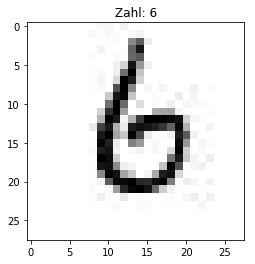

Zahlen im Minibatch: [6 6 6 7 8 1 4 5 3 7]


In [6]:
ex_img, target= next(train_gen)

plt.imshow(ex_img[0,:].reshape(28,28), cmap="gray_r")
plt.title("Zahl: {}".format(target[0]))
plt.show()
print("Zahlen im Minibatch: {}".format(target))

Da das Laden der Daten nun scheinbar funktioniert, wollen wir uns nun endlich dem Aufbau des Netzes widmen.

### 2.2 Netzwerk in Numpy aufbauen

Hierfür, und vor allem für das Arbeiten mit `Pytorch` im Späteren ist es unablässlich, Klassen einzuführen. Für mich sind sie einer der schönsten Aspekte am Programmieren

#### 2.2.1 Klassen

In [11]:
### Eine Klasse in Python hat folgende Grundstruktur:

class Klassenname():
    def __init__(self, start_parameter1, start_parameter2):
        self.eigenschaft1 = start_parameter1
        self.eigenschaft2 = start_parameter2
    
    def funktion_auf_Klasse(self):
        print("Meine Eigenschaften: {} und {}".format(self.eigenschaft1, self.eigenschaft2))
        
### Nun generieren wir uns eine sogenannte Instanz der Klasse. Wenn man sich die Klasse als Bauplan vorstellt, so
### bauen wir uns in diesem Schritt das Gebäude:

instanz = Klassenname("Karsten","Brot")
instanz.funktion_auf_Klasse()

instanz2 = Klassenname("Nicht Karsten","Kein Brot")
instanz2.funktion_auf_Klasse()

Meine Eigenschaften: Karsten und Brot
Meine Eigenschaften: Nicht Karsten und Kein Brot


Man sieht also, dass sich Klassen dafür verwenden lassen, Funktionen und Variablen, welche zusammen gehören, kompakt zusammenzuschreiben. 

---
#### AUFGABE
Schreibt eine eigene Klasse, der man interessante Parameter übergibt und die verschieden interessante Funktionen hat, die man ausführen kann!

---

In [14]:
#Klasse
class Funktion():
    def __init__(self,funktion):
        self.funktion=funktion
    def y_achsenabschnitt(self):
        if "x" in self.funktion:
            if "+" in self.funktion:
                plus=self.funktion.index("+")
                if "x" in self.funktion[:plus]:
                    c=int(self.funktion[plus:])
                    #print("Das ist c als string:{}".format(self.funktion[plus:]))
                    #print("Das ist c als integer:{}".format(int(self.funktion[plus:])))
                else:
                    c=int(self.funktion[:plus])
            elif "-" in self.funktion:
                minus=self.funktion.index("-")
                if "x" in self.funktion[:minus]:
                    c=int(self.funktion[minus:])
                else:
                    c=int(self.funktion[:minus])
            else:
                c=0
            return c
    def steigung(self):
        c=self.y_achsenabschnitt()
        if "x" in self.funktion:
                self.lfunktion=list(self.funktion)
                if str(c) in self.lfunktion:
                    self.lfunktion.remove(str(c))
                    self.lfunktion.remove("+")
                self.lfunktion.remove("x")
                if len(self.lfunktion)>0:
                    self.gkf=""
                    for i in self.lfunktion:
                        self.gkf+=i
                    m=float(self.gkf)
                else:
                    m=1.0
        return m
    def nullstellen(self):
        ys=self.y_achsenabschnitt()
        m=self.steigung()
        return -ys/m
    def output(self):
        print( """Die lineare Funktion f(x)={} 
hat: 
- den y-Achsenabschnitt c={},
- die Steigung m={}
- die Nullstelle x1={}.""".format(self.funktion,
                                  self.y_achsenabschnitt(),
                                  self.steigung(),
                                  self.nullstellen()))
ctn=True

while ctn==True:
    f=Funktion(input("f(x)="))
    f.output()
    if input("weitermachen (j/n)\n")!="j":
        ctn=False

f(x)=x+2
Die lineare Funktion f(x)=x+2 
hat: 
- den y-Achsenabschnitt c=2,
- die Steigung m=1.0
- die Nullstelle x1=-2.0.
weitermachen (j/n)
n


#### 2.2.2 Das eigentliche Netzwerk

In [7]:
class FCN(object):

    def __init__(self, train_imgs, train_targets, layers=[784,30,10], val_imgs=None, val_targets=None):
        """
        Die Liste layers gibt an, wie viele Schichten mit wie vielen 
        Neuronen man bauen möchte. Die Standardeinstellung hat die 
        Eingangschicht mit 28*28=784 Neuronen, welche unsere Eingangsdaten 
        repräsentieren, eine versteckte Schicht und eine Ausgangsschicht mit 
        10 Neuronen für unsere 10 Klassen.
        """
        self.n_layers    = len(layers)
        self.layer_sizes = layers
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(self.layer_sizes[:-1], self.layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in self.layer_sizes[1:]]
        self.train_imgs = train_imgs
        self.train_targets = train_targets
        self.val_imgs = val_imgs
        self.val_targets = val_targets
        
        self.hot_list = np.eye(10).astype(int)
        
        
    def return_shapes(self):
        print("Sizes of weights: {}".format([x.shape for x in self.weights]))
        print("Sizes of biases: {}".format([x.shape for x in self.biases]))
    
    def sigmoid(self,z):
        return 1./(1.+np.exp(-z))
    
    def deriv_sigmoid(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def loss(self, output, target):
        return 0.5*1./len(output)*np.sum((output-target)**2)
    
    def deriv_loss(self, output, target):
        return (output-target)
    
    def forward(self, x):
        """
        Berechne die Ausgabe des Netzwerkes zu einem
        Eingangswert x.
        """
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, x)+b
            x = self.sigmoid(z)
        return x

    def one_hot(self,t):
        return self.hot_list[t]
    
    def train_gen(self, bs=10):
        seed = np.random.randint(100000)
        np.random.seed(seed)
        np.random.shuffle(self.train_imgs)
        np.random.seed(seed)
        np.random.shuffle(self.train_targets)    
        
        img_sub_paths = [self.train_imgs[i:i+bs] for i in range(0,len(self.train_imgs),bs)]
        batch_targets = [self.train_targets[i:i+bs] for i in range(0,len(self.train_targets),bs)]
    
        for im_sub_path, sub_labs in zip(img_sub_paths, batch_targets):
            yield [(np.array(Image.open(im_path)).reshape(-1,1)/255.,self.one_hot(lab).reshape(-1,1)) for im_path,lab in zip(im_sub_path, sub_labs)]
                                                                                            

    def val_gen(self):
        seed = np.random.randint(100000)
        np.random.seed(seed)
        np.random.shuffle(self.val_imgs)
        np.random.seed(seed)
        np.random.shuffle(self.val_targets) 
        
        for im_path, lab in zip(self.val_imgs, self.val_targets):
            yield np.array(Image.open(im_path)).reshape(-1,1)/255., lab 
            
            
    def train(self, epochs, bs, eta):
        """
        Hier trainieren wir das Netzwerk mittels SGDm.
            - epochs ist die Anzahl der Iteration, in denen wir das 
            Netz aus den Daten lernen lassen.
            - bs ist die minibatchsize
            - eta die Lernrate
        """
        for epoch in range(epochs):
            train_datagen = self.train_gen(bs)
            for mini_batch in train_datagen:
                self.update(mini_batch, eta)
                
            if self.val_imgs is not None:
                print("Epoch {0}: Validation Accuracy: {1}".format(epoch+1, self.validate()))
            else:
                print("Epoch {}".format(epoch+1))

                      
    def update(self, mini_batch, eta):
        """
        Hier updaten wir unsere Gewichte und Offsets
        """
        grad_w = [np.zeros(w.shape) for w in self.weights]                      
        grad_b = [np.zeros(b.shape) for b in self.biases]
        
        for img, target in mini_batch:
            ### Ausführen des Backpropagationalgorithmuses
            mini_grad_b, mini_grad_w = self.backpropagate(img, target)
            grad_b = [base_gb+dgb for base_gb, dgb in zip(grad_b, mini_grad_b)]
            grad_w = [base_gw+dgw for base_gw, dgw in zip(grad_w, mini_grad_w)]
                      
        ###Updaten der Gewichte und Offsets
        self.weights = [w-(eta/len(mini_batch))*gr_w
                        for w, gr_w in zip(self.weights, grad_w)]
        self.biases = [b-(eta/len(mini_batch))*gr_b
                       for b, gr_b in zip(self.biases, grad_b)]

        
    def backpropagate(self, img, target):
        """
        Backpropagation Algorithmus
        """
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        f_value = img #Wert der entsprechenden Aktivierung
        f_values = [img] # Liste aller Aktivierungen pro Schicht
                      
        z_list = [] # Liste aller z-Vektoren pro Schicht
                    
                      
        ### In diesem Abschnitt produzieren wir die Vorhersage des Netzwerkes,
        ### um diese dann mit dem wahren Wert vergleichen zu können.
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, f_value)+b
            f_value = self.sigmoid(z)
            z_list.append(z)
            f_values.append(f_value)
                      

        ### Nun schieben wir den Fehler zurück zu den Gewichten
        ### Dabei starten wir mit dem äußersten Layer.
        d_loss  = self.deriv_loss(f_values[-1], target)
        delta   = d_loss * self.deriv_sigmoid(z_list[-1])

        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, f_values[-2].T)
        

        ### und jetzt die inneren Schichten
        for j in range(2, self.n_layers):
            z     = z_list[-j]
            d_sig = self.deriv_sigmoid(z)
            delta = np.dot(self.weights[-j+1].transpose(), delta) * d_sig
            grad_b[-j] = delta
            grad_w[-j] = np.dot(delta, f_values[-j-1].transpose())
        return (grad_b, grad_w)

    def validate(self):
        """
        Validierung laufen lassen.
        """
        val_data   = self.val_gen()
        val_result = []
        for img, target in val_data:
            val_result.append(int(np.argmax(self.forward(img))==target))
        
        return np.mean(val_result)

print("fertig")

fertig


In [25]:
net = FCN(train_imgs, train_targets, [784,10], val_imgs, val_targets)
net.train(10,10,3.0)

Epoch 1: Validation Accuracy: 0.6434291434291435
Epoch 2: Validation Accuracy: 0.7205777205777206
Epoch 3: Validation Accuracy: 0.7308022308022308
Epoch 4: Validation Accuracy: 0.7335907335907336
Epoch 5: Validation Accuracy: 0.7400972400972401
Epoch 6: Validation Accuracy: 0.742027742027742
Epoch 7: Validation Accuracy: 0.7454597454597455
Epoch 8: Validation Accuracy: 0.8184613184613184
Epoch 9: Validation Accuracy: 0.8177463177463178
Epoch 10: Validation Accuracy: 0.8211783211783211


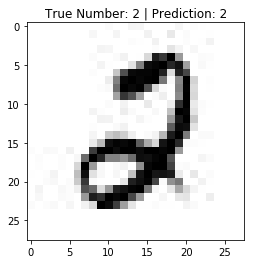

In [182]:
bt=0
rand_idx = np.random.randint(len(val_imgs))
example_image = np.array(Image.open(val_imgs[rand_idx])).reshape(-1,1)
target        = val_targets[rand_idx]
pred          = np.argmax(net.forward(example_image))

plt.imshow(example_image.reshape(28,28),cmap="gray_r")
if bt:
    plt.title("True Number: {} | Prediction: {}".format(target,target))
else:
    plt.title("True Number: {} | Prediction: {}".format(target,pred))         
plt.show()

### 2.3 Aufgaben

1. Natürlich ist nicht alles perfekt - ändert, was ihr ändern könnt und versucht, die höchste Genauigkeit zu erzielen! Tested zuerst an kleinen Datensets, und wenn ihr eine gute Struktur gefunden habt, lasst es auf einem größeren Datensatz laufen!